<a href="https://colab.research.google.com/github/Praveen3110/ML-zoomcamp-homework/blob/main/DATAZOOMCAMP_HOMEWORK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
data="https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"

In [4]:
!wget $data

--2025-10-23 10:59:47--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.04s   

2025-10-23 10:59:47 (23.8 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [5]:
df=pd.read_csv("car_fuel_efficiency.csv")

In [6]:
df


,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [7]:
df.dtypes

,0
engine_displacement,int64
num_cylinders,float64
horsepower,float64
vehicle_weight,float64
acceleration,float64
model_year,int64
origin,object
fuel_type,object
drivetrain,object
num_doors,float64


In [8]:
base=["engine_displacement","horsepower","acceleration","vehicle_weight"]
df[base]


,engine_displacement,horsepower,acceleration,vehicle_weight
0,170,159.0,17.7,3413.433759
1,130,97.0,17.8,3149.664934
2,170,78.0,15.1,3079.038997
3,220,NaN,20.2,2542.392402
4,210,140.0,14.4,3460.870990
...,...,...,...,...
9699,140,164.0,17.3,2981.107371
9700,180,154.0,15.0,2439.525729
9701,220,138.0,15.1,2583.471318
9702,230,177.0,19.4,2905.527390


In [9]:
df[base].isnull().sum()

,0
engine_displacement,0
horsepower,708
acceleration,930
vehicle_weight,0


In [10]:
a=df[base].horsepower.median()
df[base].horsepower.fillna(a)

,horsepower
0,159.0
1,97.0
2,78.0
3,149.0
4,140.0
...,...
9699,164.0
9700,154.0
9701,138.0
9702,177.0


In [11]:
def fill_median(base):
  for i in base:
    a=df[i].median()
    df[i]=df[i].fillna(a)
fill_median(base)

In [12]:
df #we have a clean base features

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,149.0,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [13]:
df[base].isnull().sum()

,0
engine_displacement,0
horsepower,0
acceleration,0
vehicle_weight,0


In [14]:
categories=["origin","fuel_type","drive_train","num_doors"]

In [15]:
df["num_doors"]=df["num_doors"].replace({-1:1,-2:2,-3:3,-4:4})
df["num_doors"].value_counts()
df["num_doors"].isnull().sum()
df["num_doors"]=df["num_doors"].fillna(4)

In [16]:
df["num_doors"].value_counts()

,count
num_doors,
1.0,4375
0.0,3551
2.0,1157
4.0,507
3.0,114


In [17]:
features=[]
for n in [0,1,2,3,4]:
  df["num_doors_%s"%n] = (df.num_doors==n).astype("int")
  features.append("num_doors_%s"%n)

In [18]:
features

['num_doors_0', 'num_doors_1', 'num_doors_2', 'num_doors_3', 'num_doors_4']

In [19]:
features=base + features
features.append("fuel_efficiency_mpg")

In [20]:
features

['engine_displacement',
 'horsepower',
 'acceleration',
 'vehicle_weight',
 'num_doors_0',
 'num_doors_1',
 'num_doors_2',
 'num_doors_3',
 'num_doors_4',
 'fuel_efficiency_mpg']

In [21]:
df[features]

,engine_displacement,horsepower,acceleration,vehicle_weight,num_doors_0,num_doors_1,num_doors_2,num_doors_3,num_doors_4,fuel_efficiency_mpg
0,170,159.0,17.7,3413.433759,1,0,0,0,0,13.231729
1,130,97.0,17.8,3149.664934,1,0,0,0,0,13.688217
2,170,78.0,15.1,3079.038997,1,0,0,0,0,14.246341
3,220,149.0,20.2,2542.392402,0,0,1,0,0,16.912736
4,210,140.0,14.4,3460.870990,0,0,1,0,0,12.488369
...,...,...,...,...,...,...,...,...,...,...
9699,140,164.0,17.3,2981.107371,0,0,0,0,1,15.101802
9700,180,154.0,15.0,2439.525729,1,0,0,0,0,17.962326
9701,220,138.0,15.1,2583.471318,0,1,0,0,0,17.186587
9702,230,177.0,19.4,2905.527390,0,1,0,0,0,15.331551


In [22]:
categories=["origin","fuel_type","drivetrain","num_doors"]

In [23]:
origins=list(df["origin"].value_counts().head().index)
origins

for v in origins:
  df["country_%s" %v]=(df.origin==v).astype("int")
  features.append("country_%s" %v)

In [24]:
for i in categories:
  a=df[i].value_counts()
  b=list(df[i].unique())

  print(a)
  print(b)
  print("")

origin
Europe    3254
Asia      3247
USA       3203
Name: count, dtype: int64
['Europe', 'USA', 'Asia']

fuel_type
Gasoline    4898
Diesel      4806
Name: count, dtype: int64
['Gasoline', 'Diesel']

drivetrain
All-wheel drive      4876
Front-wheel drive    4828
Name: count, dtype: int64
['All-wheel drive', 'Front-wheel drive']

num_doors
1.0    4375
0.0    3551
2.0    1157
4.0     507
3.0     114
Name: count, dtype: int64
[np.float64(0.0), np.float64(2.0), np.float64(1.0), np.float64(4.0), np.float64(3.0)]



In [25]:
features

['engine_displacement',
 'horsepower',
 'acceleration',
 'vehicle_weight',
 'num_doors_0',
 'num_doors_1',
 'num_doors_2',
 'num_doors_3',
 'num_doors_4',
 'fuel_efficiency_mpg',
 'country_Europe',
 'country_Asia',
 'country_USA']

In [26]:
fuel_type=list(df["fuel_type"].value_counts().head().index)
fuel_type
for n in fuel_type:
  df["fuel_%s"%n]=(df.fuel_type==n).astype("int")
  features.append("fuel_%s"%n)

In [27]:
features

['engine_displacement',
 'horsepower',
 'acceleration',
 'vehicle_weight',
 'num_doors_0',
 'num_doors_1',
 'num_doors_2',
 'num_doors_3',
 'num_doors_4',
 'fuel_efficiency_mpg',
 'country_Europe',
 'country_Asia',
 'country_USA',
 'fuel_Gasoline',
 'fuel_Diesel']

In [28]:
#final columns for model training
df_features=df[features]

In [29]:
n=len(df)
n_test=int(n*0.2)
n_val=int(n*0.2)
n_train=n-(n_test+n_val)
n_train,n_test,n_val

(5824, 1940, 1940)

In [30]:
idx=np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

In [31]:
df_train=df_features.iloc[idx[:n_train]]
df_test=df_features.iloc[idx[n_train:n_train+n_test]]
df_val=df_features.iloc[idx[n_train+n_test:]]

In [32]:
df_train=df_train.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)

In [33]:
df_train

,engine_displacement,horsepower,acceleration,vehicle_weight,num_doors_0,num_doors_1,num_doors_2,num_doors_3,num_doors_4,fuel_efficiency_mpg,country_Europe,country_Asia,country_USA,fuel_Gasoline,fuel_Diesel
0,170,164.0,9.7,2990.040917,1,0,0,0,0,15.963019,1,0,0,0,1
1,170,149.0,13.2,2729.623741,1,0,0,0,0,15.931964,0,0,1,1,0
2,200,142.0,17.3,3126.513375,1,0,0,0,0,14.284901,0,1,0,0,1
3,200,148.0,15.5,3136.477901,0,0,1,0,0,14.865210,0,0,1,0,1
4,230,141.0,15.9,3384.681613,0,0,0,1,0,12.428822,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,210,145.0,16.0,3054.841280,0,1,0,0,0,14.216871,0,1,0,1,0
5820,210,142.0,15.0,2440.034914,0,1,0,0,0,17.826995,0,0,1,1,0
5821,260,169.0,15.0,2701.627103,1,0,0,0,0,16.028769,0,0,1,0,1
5822,240,137.0,16.1,2383.896460,0,0,1,0,0,17.794204,0,1,0,0,1


In [34]:
df_train.columns


Index(['engine_displacement', 'horsepower', 'acceleration', 'vehicle_weight',
       'num_doors_0', 'num_doors_1', 'num_doors_2', 'num_doors_3',
       'num_doors_4', 'fuel_efficiency_mpg', 'country_Europe', 'country_Asia',
       'country_USA', 'fuel_Gasoline', 'fuel_Diesel'],
      dtype='object')

In [35]:
input_features=['engine_displacement', 'horsepower', 'acceleration', 'vehicle_weight',
       'num_doors_0', 'num_doors_1', 'num_doors_2', 'num_doors_3',
       'num_doors_4', 'country_Europe', 'country_Asia', 'country_USA',
       'fuel_Gasoline', 'fuel_Diesel']

In [36]:
output_features=["fuel_efficiency_mpg"]

In [37]:
x_train=df_train[input_features].values
x_test=df_test[input_features].values
x_val=df_val[input_features].values

In [38]:
y_train=df_train[output_features].values
y_test=df_test[output_features].values
y_val=df_val[output_features].values


In [39]:
y_train

array([[15.96301887],
       [15.93196432],
       [14.28490115],
       ...,
       [16.02876881],
       [17.79420446],
       [18.04456134]])

In [40]:
  xtx=x_train.T @ x_train
  xtx_inv=np.linalg.pinv(xtx)

linear regression model


In [41]:
def linear_regression(x,y):
  ones=np.ones(len(x))
  x=np.column_stack([ones,x])

  w_full= np.linalg.pinv(x.T @ x) @ x.T @ y

  return w_full[0],w_full[1:]

In [42]:
bias,weights=linear_regression(x_train,y_train)

In [43]:
y_pred=  bias+ x_train @ weights

In [44]:
y_pred

array([[15.71129287],
       [16.51689137],
       [14.06900707],
       ...,
       [16.70590847],
       [17.87553714],
       [17.65200265]])

<Axes: ylabel='Count'>

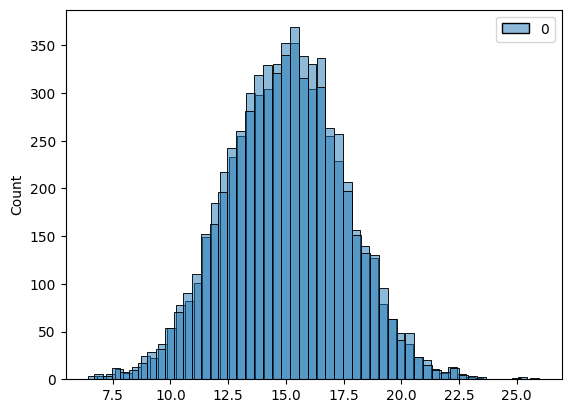

In [45]:
sns.histplot(y_pred,color="red",alpha=0.5,bins=50)
sns.histplot(y_train,color="blue",alpha=0.5,bins=50)

In [46]:
def rmse(y,y_pred):
  error=y-y_pred
  se=error**2
  mse=se.mean()
  return np.sqrt(mse)

In [47]:
rmse(y_train,y_pred)

np.float64(0.3951350194373502)

VALIDATING THE MODEL

In [48]:
df_val.isnull().sum()

,0
engine_displacement,0
horsepower,0
acceleration,0
vehicle_weight,0
num_doors_0,0
num_doors_1,0
num_doors_2,0
num_doors_3,0
num_doors_4,0
fuel_efficiency_mpg,0


In [49]:
y_pred_val=  bias+ x_val @ weights

In [50]:
rmse(y_val,y_pred_val)

np.float64(0.39336539929004116)

SIMPLE FEATURE ENGINEERING

In [51]:
df_train

,engine_displacement,horsepower,acceleration,vehicle_weight,num_doors_0,num_doors_1,num_doors_2,num_doors_3,num_doors_4,fuel_efficiency_mpg,country_Europe,country_Asia,country_USA,fuel_Gasoline,fuel_Diesel
0,170,164.0,9.7,2990.040917,1,0,0,0,0,15.963019,1,0,0,0,1
1,170,149.0,13.2,2729.623741,1,0,0,0,0,15.931964,0,0,1,1,0
2,200,142.0,17.3,3126.513375,1,0,0,0,0,14.284901,0,1,0,0,1
3,200,148.0,15.5,3136.477901,0,0,1,0,0,14.865210,0,0,1,0,1
4,230,141.0,15.9,3384.681613,0,0,0,1,0,12.428822,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,210,145.0,16.0,3054.841280,0,1,0,0,0,14.216871,0,1,0,1,0
5820,210,142.0,15.0,2440.034914,0,1,0,0,0,17.826995,0,0,1,1,0
5821,260,169.0,15.0,2701.627103,1,0,0,0,0,16.028769,0,0,1,0,1
5822,240,137.0,16.1,2383.896460,0,0,1,0,0,17.794204,0,1,0,0,1


In [52]:
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,...,num_doors_0,num_doors_1,num_doors_2,num_doors_3,num_doors_4,country_Europe,country_Asia,country_USA,fuel_Gasoline,fuel_Diesel
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,...,1,0,0,0,0,1,0,0,1,0
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,...,1,0,0,0,0,0,0,1,1,0
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,...,1,0,0,0,0,1,0,0,1,0
3,220,4.0,149.0,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,...,0,0,1,0,0,0,0,1,0,1
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,4.0,...,0,0,0,0,1,1,0,0,0,1
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,...,1,0,0,0,0,0,0,1,1,0
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,1.0,...,0,1,0,0,0,0,0,1,0,1
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,...,0,1,0,0,0,0,0,1,0,1


REGULARIZATION

In [53]:
bias,weights

(array([14.70141601]),
 array([[ 2.13281055e-04],
        [ 1.03092424e-02],
        [-9.93516157e-02],
        [-5.00058930e-03],
        [ 2.95410976e+00],
        [ 2.94331664e+00],
        [ 2.97091067e+00],
        [ 2.84872051e+00],
        [ 2.98435843e+00],
        [ 4.89252776e+00],
        [ 4.90816186e+00],
        [ 4.90072639e+00],
        [ 7.34947292e+00],
        [ 7.35194309e+00]]))

In [54]:
#if any now of the column in our features are same then we cannot do inverse of the gram matrix as it forms a singular matrix

In [55]:
#to solve this problem we can add a small number in the diagonal of the matrix

In [56]:
XTX=[
    [1,2,3],
    [2,1,1.00001],
    [2,1.00001,1]
]


In [57]:
XTX+ 0.01 * np.eye(3) #adding a small value to the diagonal of the matrix

array([[1.01   , 2.     , 3.     ],
       [2.     , 1.01   , 1.00001],
       [2.     , 1.00001, 1.01   ]])

In [58]:
np.linalg.inv(XTX)

array([[-2.50001563e-01,  1.25003906e+04, -1.24997656e+04],
       [ 2.50000313e-01, -6.25000781e+04,  6.24999531e+04],
       [ 2.50000313e-01,  3.74999219e+04, -3.75000469e+04]])

In [59]:
def linear_regression_reg(x,y,r=1):
  ones=np.ones(len(x))
  x=np.column_stack([ones,x])

  XTX= x.T @ x
  XTX= XTX + r * np.eye(XTX.shape[0])

  XTX_inv=np.linalg.inv(XTX)
  w_full=XTX_inv @ x.T @ y

  return w_full[0],w_full[1:]

In [60]:
bias,weights=linear_regression_reg(x_train,y_train,r=0.01)
y_pred=  bias+ x_val @ weights
rmse(y_val,y_pred)
# the best r value needs to be find for this 1 is the best solution but it can be found using the finetuning

np.float64(0.39337784504311785)

Tuning the model

In [61]:
for r in [0.00,0.01,0.00000001,0.00001,0.001,0.1,1,10]:
  bias,weights=linear_regression_reg(x_train,y_train,r=r)
  y_pred=  bias+ x_val @ weights
  score=rmse(y_val,y_pred)

  print(f"r:{r}\n,bias_charm:{bias}\n,score:{score}\n")

r:0.0
,bias_charm:[45.5116477]
,score:35.0720448852494

r:0.01
,bias_charm:[14.69990279]
,score:0.39337784504311785

r:1e-08
,bias_charm:[14.69970801]
,score:0.3933622690872163

r:1e-05
,bias_charm:[14.70141262]
,score:0.3933654063921762

r:0.001
,bias_charm:[14.70126467]
,score:0.3933666354372932

r:0.1
,bias_charm:[14.68629819]
,score:0.3934983090255638

r:1
,bias_charm:[14.55166675]
,score:0.3955183353504957

r:10
,bias_charm:[13.33287014]
,score:0.47436432830187



In [62]:
bias,weights=linear_regression_reg(x_train,y_train,r=0)
y_pred=  bias+ x_val @ weights
score=rmse(y_val,y_pred)
print(score)

35.0720448852494


using the model

In [63]:
df_full_train=pd.concat([df_train,df_val])
df_full_train=df_full_train.reset_index(drop=True)

In [64]:
df_full_train[input_features]

,engine_displacement,horsepower,acceleration,vehicle_weight,num_doors_0,num_doors_1,num_doors_2,num_doors_3,num_doors_4,country_Europe,country_Asia,country_USA,fuel_Gasoline,fuel_Diesel
0,170,164.0,9.7,2990.040917,1,0,0,0,0,1,0,0,0,1
1,170,149.0,13.2,2729.623741,1,0,0,0,0,0,0,1,1,0
2,200,142.0,17.3,3126.513375,1,0,0,0,0,0,1,0,0,1
3,200,148.0,15.5,3136.477901,0,0,1,0,0,0,0,1,0,1
4,230,141.0,15.9,3384.681613,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7759,150,201.0,12.3,2925.864524,0,1,0,0,0,0,1,0,0,1
7760,120,99.0,16.8,2977.701087,0,1,0,0,0,1,0,0,0,1
7761,100,169.0,12.9,2674.576543,1,0,0,0,0,0,1,0,0,1
7762,220,187.0,11.0,2226.378943,0,1,0,0,0,1,0,0,0,1


In [65]:
x_full_train=df_full_train[input_features].values
x_full_train



array([[170. , 164. ,   9.7, ...,   0. ,   0. ,   1. ],
       [170. , 149. ,  13.2, ...,   1. ,   1. ,   0. ],
       [200. , 142. ,  17.3, ...,   0. ,   0. ,   1. ],
       ...,
       [100. , 169. ,  12.9, ...,   0. ,   0. ,   1. ],
       [220. , 187. ,  11. , ...,   0. ,   0. ,   1. ],
       [190. , 155. ,  14.5, ...,   0. ,   0. ,   1. ]])

In [66]:
y_full_train=df_full_train[output_features].values
len(y_full_train)

7764

In [67]:
bias,weights=linear_regression_reg(x_full_train,y_full_train,r=0.000001)
bias,weights

(array([14.72534149]),
 array([[ 1.20414033e-04],
        [ 1.01937948e-02],
        [-9.92400921e-02],
        [-5.00547677e-03],
        [ 2.95926485e+00],
        [ 2.95099618e+00],
        [ 2.96384143e+00],
        [ 2.87357614e+00],
        [ 2.97772918e+00],
        [ 4.89872391e+00],
        [ 4.91451671e+00],
        [ 4.91213110e+00],
        [ 7.36078925e+00],
        [ 7.36461359e+00]]))

In [68]:
bias,weights=linear_regression_reg(x_full_train,y_full_train,r=0.000000001)
y_pred=  bias+ x_test @ weights
score=rmse(y_test,y_pred)
print(score)

0.4001016524450533


In [69]:
car=df_test.iloc[20].to_dict()
car

{'engine_displacement': 120.0,
 'horsepower': 128.0,
 'acceleration': 16.7,
 'vehicle_weight': 1936.6682717455456,
 'num_doors_0': 1.0,
 'num_doors_1': 0.0,
 'num_doors_2': 0.0,
 'num_doors_3': 0.0,
 'num_doors_4': 0.0,
 'fuel_efficiency_mpg': 19.9499415620406,
 'country_Europe': 0.0,
 'country_Asia': 0.0,
 'country_USA': 1.0,
 'fuel_Gasoline': 0.0,
 'fuel_Diesel': 1.0}

In [70]:
df_small=pd.DataFrame([car])
df_small

,engine_displacement,horsepower,acceleration,vehicle_weight,num_doors_0,num_doors_1,num_doors_2,num_doors_3,num_doors_4,fuel_efficiency_mpg,country_Europe,country_Asia,country_USA,fuel_Gasoline,fuel_Diesel
0,120.0,128.0,16.7,1936.668272,1.0,0.0,0.0,0.0,0.0,19.949942,0.0,0.0,1.0,0.0,1.0


In [71]:
x_small=df_small[input_features].values
x_small

array([[1.20000000e+02, 1.28000000e+02, 1.67000000e+01, 1.93666827e+03,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 1.00000000e+00]])

In [72]:
y_pred=  bias+ x_small @ weights
y_pred

array([[19.93076284]])

In [82]:
float(df_full_train[df["vehicle_weight"]==1936.6682717455456]["fuel_efficiency_mpg"].values)

/tmp/ipython-input-4199270172.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  float(df_full_train[df["vehicle_weight"]==1936.6682717455456]["fuel_efficiency_mpg"].values)
/tmp/ipython-input-4199270172.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  float(df_full_train[df["vehicle_weight"]==1936.6682717455456]["fuel_efficiency_mpg"].values)


15.557234613168074